In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Load data into dataframe
data = pd.read_csv('Asteroids_Classification.csv')
data.head(10)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
5,3671135,3671135,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295,J2000,False
6,2495323,2495323,19.6,0.319562,0.714562,319.561887,714.562102,0.198566,0.444008,1048.431420,...,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295,J2000,False
7,2153315,2153315,19.2,0.384198,0.859093,384.197891,859.092601,0.238729,0.533815,1260.491809,...,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978,J2000,False
8,2162463,2162463,17.8,0.732074,1.636967,732.073989,1636.967205,0.454890,1.017164,2401.817627,...,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864,J2000,False
9,2306383,2306383,21.5,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,...,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862,J2000,True


In [3]:
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

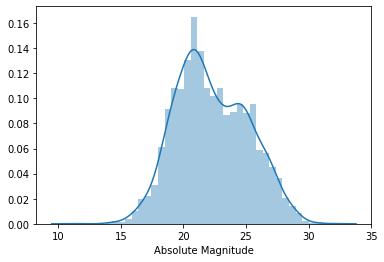

In [4]:
plt.figure()
sns.distplot(data['Absolute Magnitude'])
plt.show()

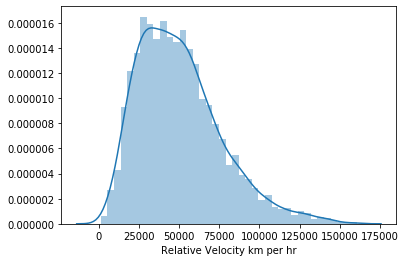

In [5]:
plt.figure()
sns.distplot(data['Relative Velocity km per hr'])
plt.show()

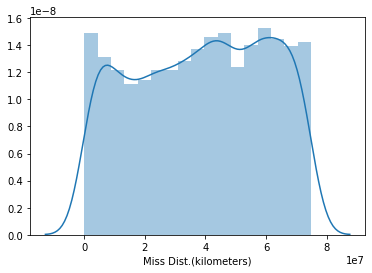

In [6]:
plt.figure()
sns.distplot(data['Miss Dist.(kilometers)'])
plt.show()

## Understanding the dependent variable

In [7]:
data['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [8]:
data.corr()['Hazardous']

Neo Reference ID               -0.269028
Name                           -0.269028
Absolute Magnitude             -0.325522
Est Dia in KM(min)              0.132424
Est Dia in KM(max)              0.132424
Est Dia in M(min)               0.132424
Est Dia in M(max)               0.132424
Est Dia in Miles(min)           0.132424
Est Dia in Miles(max)           0.132424
Est Dia in Feet(min)            0.132424
Est Dia in Feet(max)            0.132424
Epoch Date Close Approach      -0.079020
Relative Velocity km per sec    0.191970
Relative Velocity km per hr     0.191970
Miles per hour                  0.191970
Miss Dist.(Astronomical)        0.032407
Miss Dist.(lunar)               0.032407
Miss Dist.(kilometers)          0.032407
Miss Dist.(miles)               0.032407
Orbit ID                        0.247369
Orbit Uncertainity             -0.328721
Minimum Orbit Intersection     -0.288949
Jupiter Tisserand Invariant    -0.003404
Epoch Osculation                0.040940
Eccentricity    

## Construct feature set

In [9]:
# Discard columns with identical values, identifiers, etc.
X = data[['Absolute Magnitude', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Epoch Date Close Approach', 
          'Relative Velocity km per hr', 'Miles per hour','Miss Dist.(miles)','Orbit Uncertainity','Minimum Orbit Intersection',
          'Jupiter Tisserand Invariant','Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination','Asc Node Longitude',
          'Orbital Period', 'Perihelion Distance','Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly','Mean Motion']]
X.head(5)

,Absolute Magnitude,Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,21.6,417.388066,933.308089,788947200000,22017.003799,13680.509944,38993336.0,5,0.025282,4.634,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,21.3,479.225620,1071.581063,788947200000,65210.346095,40519.173105,35603420.0,3,0.186935,5.457,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,20.3,759.521423,1698.341531,789552000000,27326.560182,16979.661798,4736657.5,0,0.043058,4.557,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,27.4,28.876199,64.569144,790156800000,40225.948191,24994.839864,26522368.0,6,0.005512,5.093,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,21.6,417.388066,933.308089,790156800000,35426.991794,22012.954985,37910368.0,1,0.034798,5.154,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 22 columns):
Absolute Magnitude             4687 non-null float64
Est Dia in Feet(min)           4687 non-null float64
Est Dia in Feet(max)           4687 non-null float64
Epoch Date Close Approach      4687 non-null int64
Relative Velocity km per hr    4687 non-null float64
Miles per hour                 4687 non-null float64
Miss Dist.(miles)              4687 non-null float64
Orbit Uncertainity             4687 non-null int64
Minimum Orbit Intersection     4687 non-null float64
Jupiter Tisserand Invariant    4687 non-null float64
Epoch Osculation               4687 non-null float64
Eccentricity                   4687 non-null float64
Semi Major Axis                4687 non-null float64
Inclination                    4687 non-null float64
Asc Node Longitude             4687 non-null float64
Orbital Period                 4687 non-null float64
Perihelion Distance            4687 non-null floa

In [11]:
X.describe()

,Absolute Magnitude,Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(miles),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,671.273653,1501.013521,1.179881e+12,50294.919829,31251.307268,2.386902e+07,3.516962,0.082320,5.056111,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,1212.511199,2711.257465,1.981540e+11,26255.601377,16314.209644,1.355279e+07,3.078307,0.090300,1.237818,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,3.315431,7.413530,7.889472e+11,1207.814804,750.489149,1.653462e+04,0.000000,0.000002,2.196000,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,109.784247,245.485039,1.015574e+12,30358.313370,18863.475327,1.240212e+07,0.000000,0.014585,4.049500,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,363.529809,812.877364,1.203062e+12,46504.401181,28896.026390,2.463595e+07,3.000000,0.047365,5.071000,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,832.798679,1862.194459,1.355558e+12,65079.535405,40437.892430,3.570935e+07,6.000000,0.123593,6.019000,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,51114.018738,114294.420501,1.473318e+12,160681.487851,99841.227826,4.646713e+07,9.000000,0.477891,9.025000,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


## Normalize feature set

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.23104209, -0.20941058, -0.20941058, -1.97308738, -1.07713904,
        -1.07713904,  1.11607503,  0.48182219, -0.63171955, -0.34104856,
         0.3009042 ,  0.23821558,  0.01287488, -0.67195451,  1.37719066,
        -0.07004915, -0.02117222, -1.22388641,  0.01957056,  0.45919023,
         0.77839321, -0.43110028],
       [-0.33482448, -0.15840557, -0.15840557, -1.97308738,  0.56814611,
         0.56814611,  0.8659215 , -0.167955  ,  1.15865026,  0.3239018 ,
         0.3009042 , -0.17123418, -0.5580782 ,  1.37531503, -0.3431925 ,
        -0.56539287, -0.39326705,  1.24789699, -0.51480172,  0.07081791,
        -0.06909298,  0.31258164],
       [-0.68076581,  0.07278876,  0.07278876, -1.97003488, -0.8748918 ,
        -0.8748918 , -1.41184277, -1.14262078, -0.43484356, -0.40326142,
         0.3009042 , -0.19022296,  0.11173524, -0.83546712,  0.84557267,
         0.02156329,  0.56772222,  0.62301108, -0.02132314,  0.41557933,
         1.03940428, -0.52211437],
       [ 1.77541761

In [13]:
y = data['Hazardous'].values
y[0:5]

array([ True, False,  True, False,  True])

## Split data into test and train set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3280, 22) (3280,)
Test set: (1407, 22) (1407,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Train, test, evaluate 3-NN Classifier

In [16]:
# Predict using 3-NN Classifier
y_hat = neighbors.predict(X_test)
y_hat[0:5]

array([False, False, False, False,  True])

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighbors.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.9478658536585366
Test set Accuracy:  0.8877043354655295


## Train, test, evaluate 5-NN Classifier

In [18]:
neighbors_1 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_hat_1 = neighbors_1.predict(X_test)

print(neighbors_1)
print(metrics.accuracy_score(y_train, neighbors_1.predict(X_train)))
print(metrics.accuracy_score(y_test, y_hat_1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.9414634146341463
0.8877043354655295


## Determine best value of K

In [19]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neighbors = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat=neighbors.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

mean_acc

array([0.87633262, 0.87633262, 0.88770434, 0.88415068, 0.88770434,
       0.88272921, 0.89054726, 0.88201848, 0.88130775])

In [20]:
print( "The best accuracy of", mean_acc.max(), "was measured with k=", mean_acc.argmax()+1)

The best accuracy of 0.8905472636815921 was measured with k= 7


In [21]:
print('prediction set:', y_hat_1[0:5])
print('test set:      ', y_test[0:5])

prediction set: [False False False False  True]
test set:       [False False False False False]
